In [1]:
import scanpy as sc
# import episcanpy as epi
import pandas as pd
import numpy as np
import anndata as ad
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [2]:
%ls 

best_parameter_estimation_number/         litterature/
CTM_parameter_distributions.ipynb         MEF_data_bursting/
Fh1_kde_scatterplot2.png                  plot_gtm_5000/
Fh1_kde_scatterplot.png                   plot_GTM_fibroblast_adults/
fibroblast_SS3/                           plots_GTM_distributions.ipynb
kde_function_bursting-c57_Fos-5000.ipynb  posterior/
kde_function_bursting-c57_Fos.ipynb       Sandberg/
kde_function_bursting-cast_Fos.ipynb      transcriptional_bursting/
kde_function_bursting.ipynb               Untitled.ipynb


In [3]:
adata = ad.read("./fibroblast_SS3/processed_data/mus_musculus_preprocessed_all_params.h5ad")
adata

AnnData object with n_obs × n_vars = 682 × 7439
    obs: 'plate', 'leiden', 'clusters', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'sum_allele_c57', 'sum_allele_cast', 'sum_ratio_allele_c57', 'sum_ratio_allele_cast', 'ratio_sum_allele_c57', 'ratio_sum_allele_cast', 'ratio_mean_allele_c57', 'ratio_mean_allele_cast', 'ratio_std_allele_c57', 'ratio_std_allele_cast', 'allele_p_value', 'gene_name', 'chromosome', 'autosomes', 'nuclear', 'Ribosomal_prot', 'gene_count_corr', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes', 'c57_kon', 'c57_koff', 'c57_ksyn', 'cast_kon', 'cast_koff', 'cast_ksyn', 'total_kon', 'tota

In [5]:
adata.var['c57_kon']

Gene
Mrpl15           0.137540
4732440D04Rik    0.779018
Cops5            0.784568
Arfgef1          0.562565
Tram1            3.433453
                   ...   
Exosc7           0.638748
Lars2            0.110824
Sacm1l           0.431688
Gm5637           0.117589
Mid1             0.208090
Name: c57_kon, Length: 7439, dtype: float64

In [11]:
fos_index = adata.var_names.tolist().index('Fos')
atf4_index = adata.var_names.tolist().index('Atf4')
print(adata.var['c57_kon'][fos_index], adata.var['total_kon'][fos_index])

0.5879134867667065 1000.0


/tmp/ipykernel_85653/1190208166.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(adata.var['c57_kon'])


<AxesSubplot: xlabel='c57_kon', ylabel='Density'>

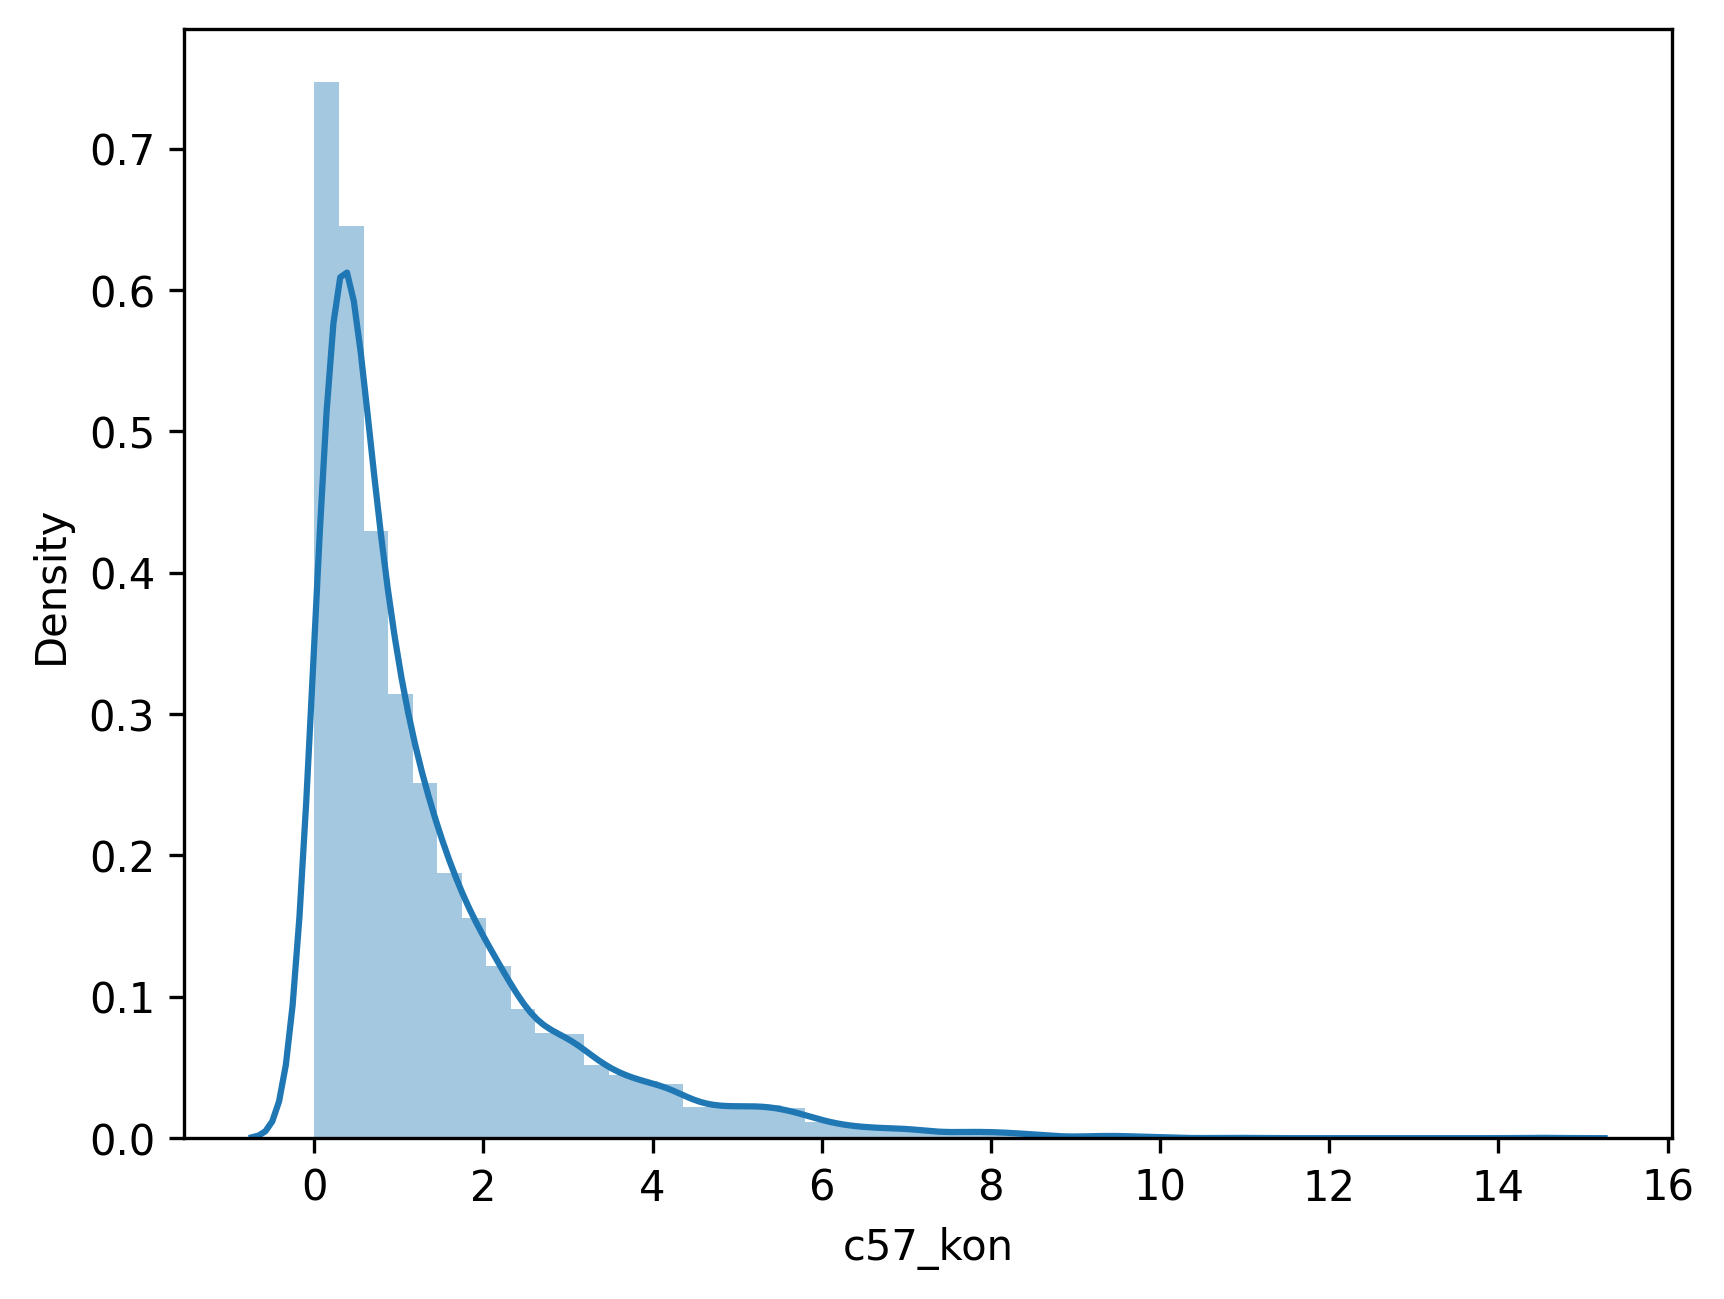

In [6]:
sns.distplot(adata.var['c57_kon'])

<AxesSubplot: xlabel='c57_kon', ylabel='cast_kon'>

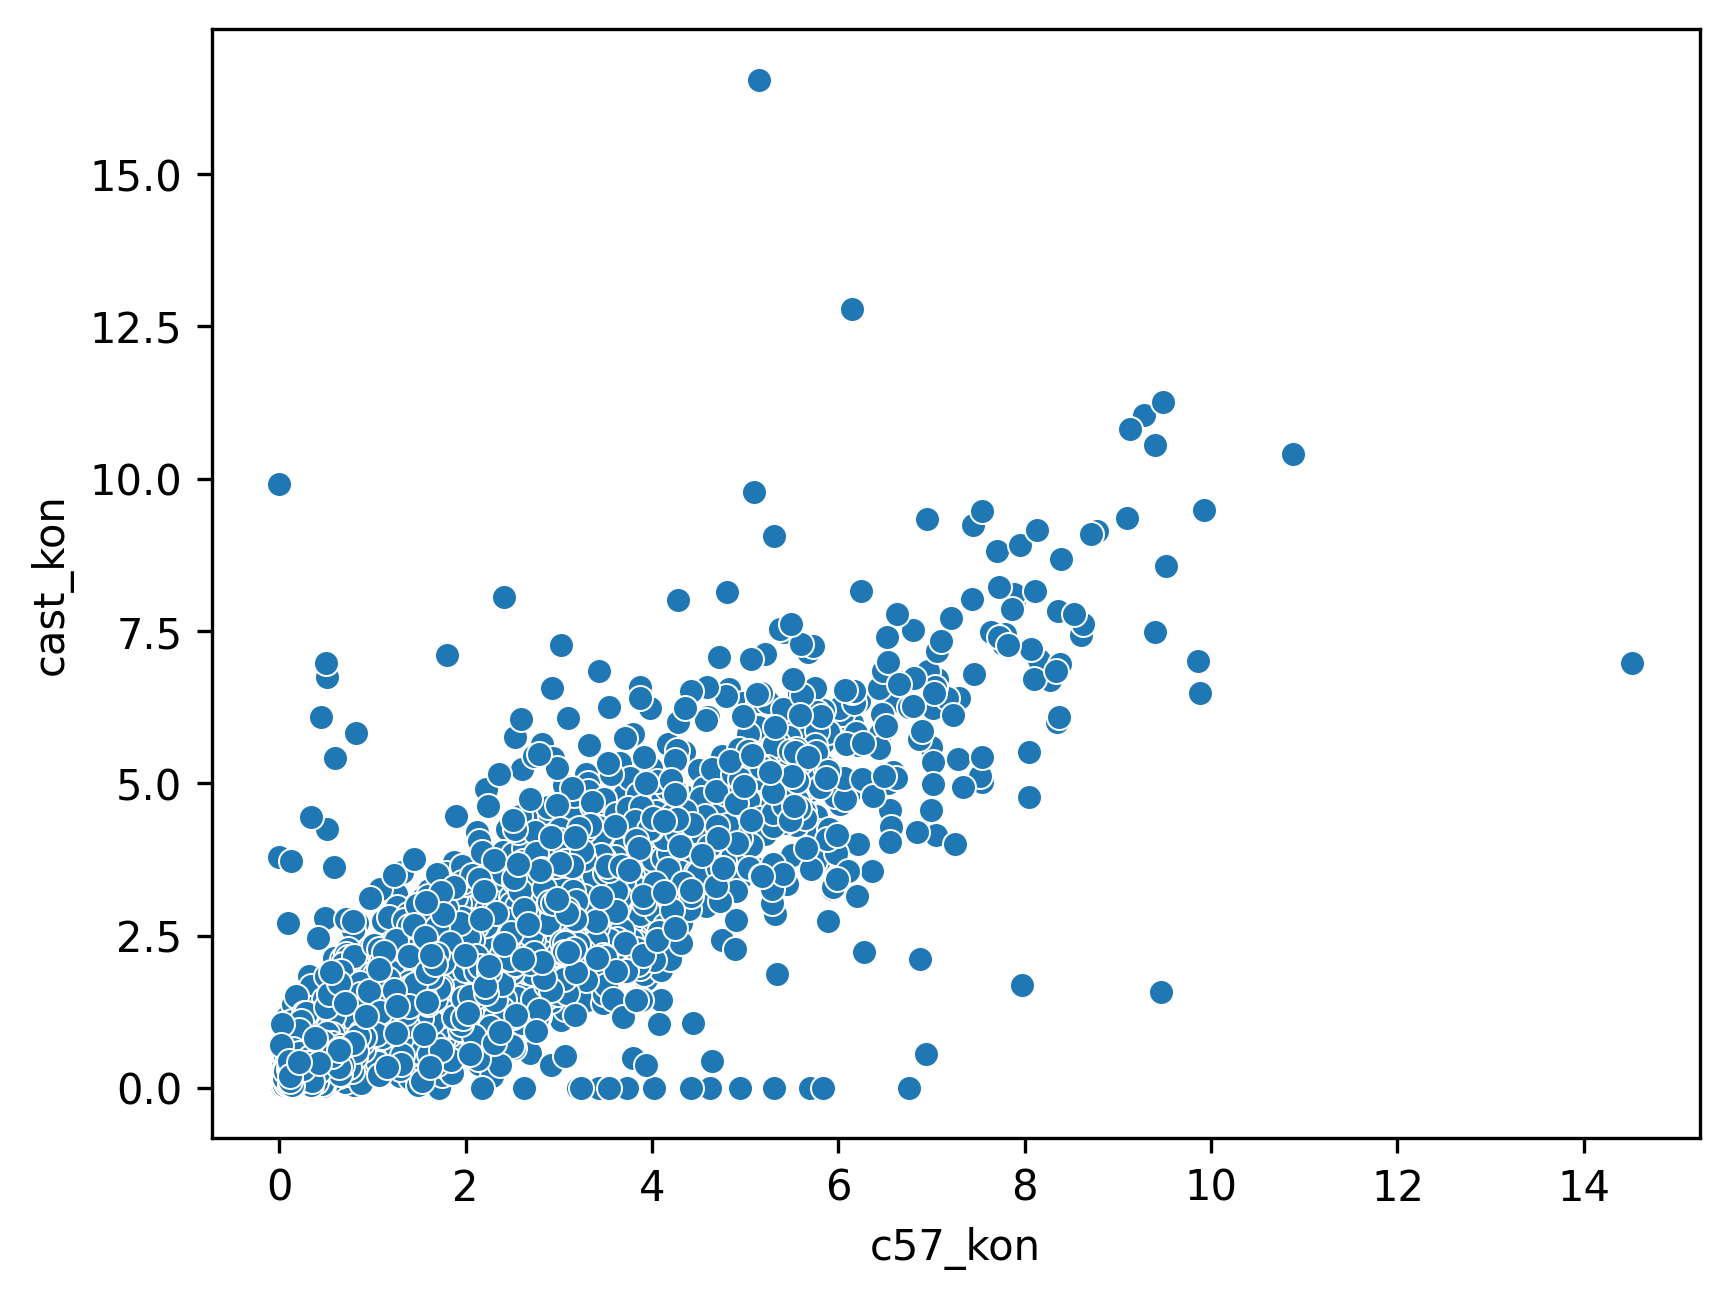

In [7]:
sns.scatterplot(adata.var, x='c57_kon', y='cast_kon')

<AxesSubplot: xlabel='c57_kon', ylabel='c57_koff'>

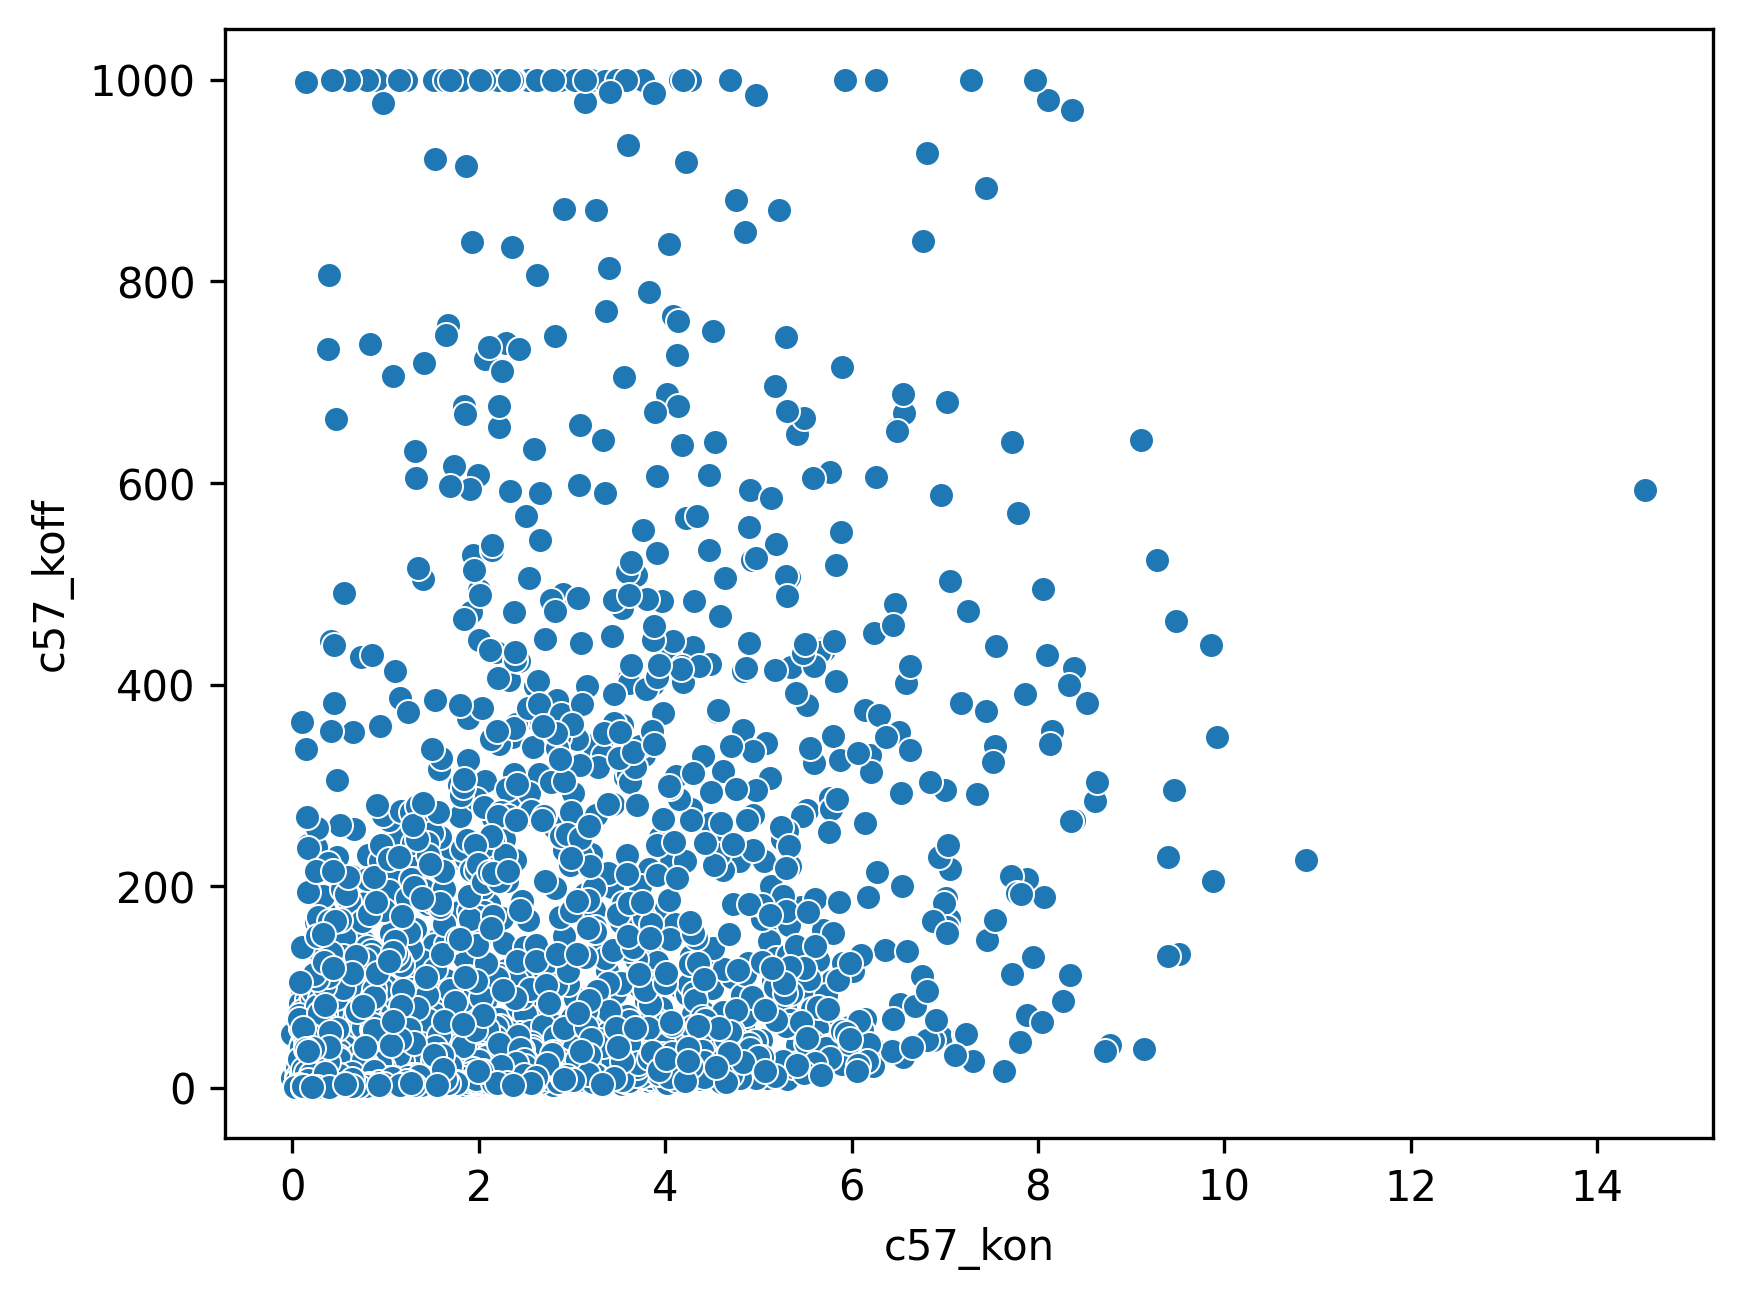

In [12]:
sns.scatterplot(adata.var, x='c57_kon', y='c57_koff')

<AxesSubplot: xlabel='cast_kon', ylabel='cast_koff'>

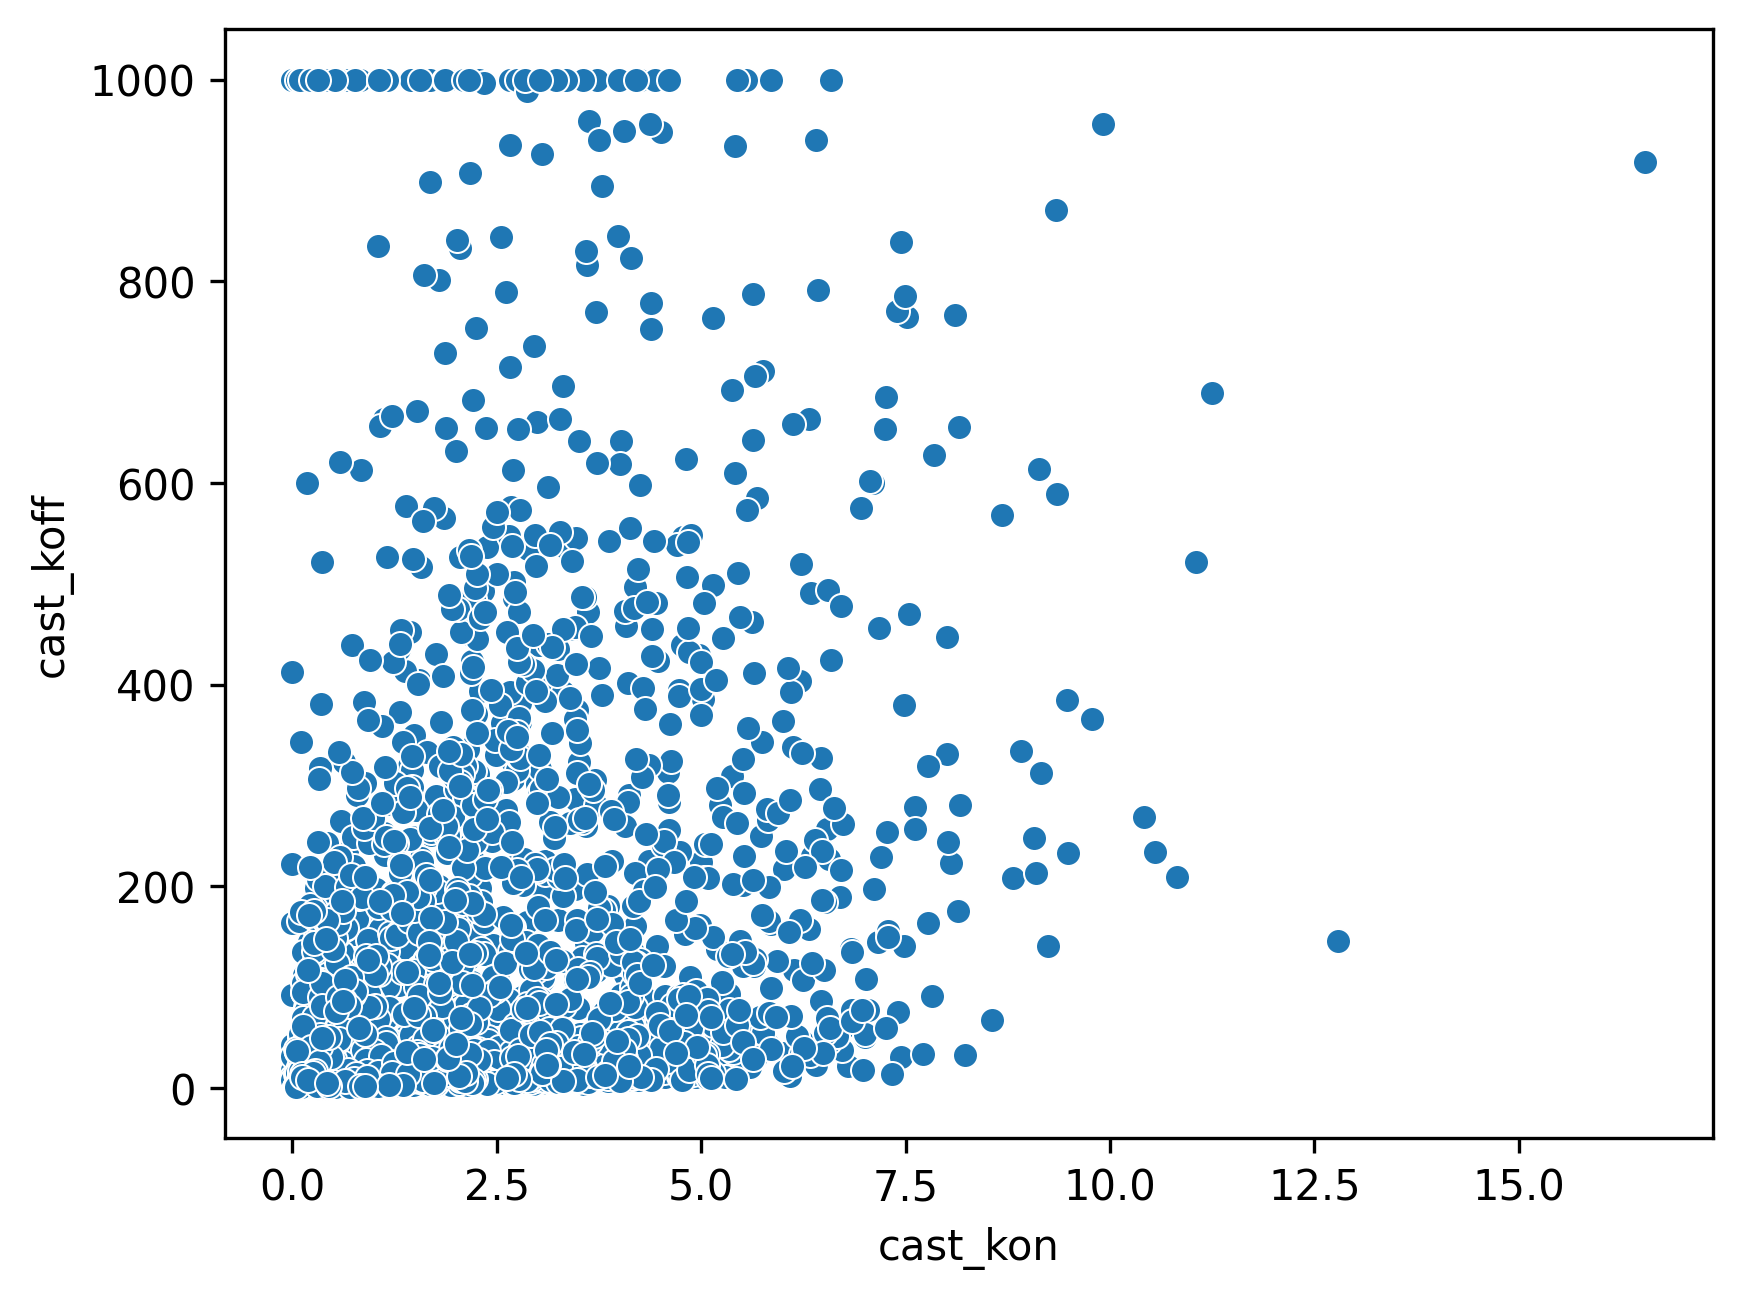

In [13]:
sns.scatterplot(adata.var, x='cast_kon', y='cast_koff')

<AxesSubplot: xlabel='total_kon', ylabel='total_koff'>

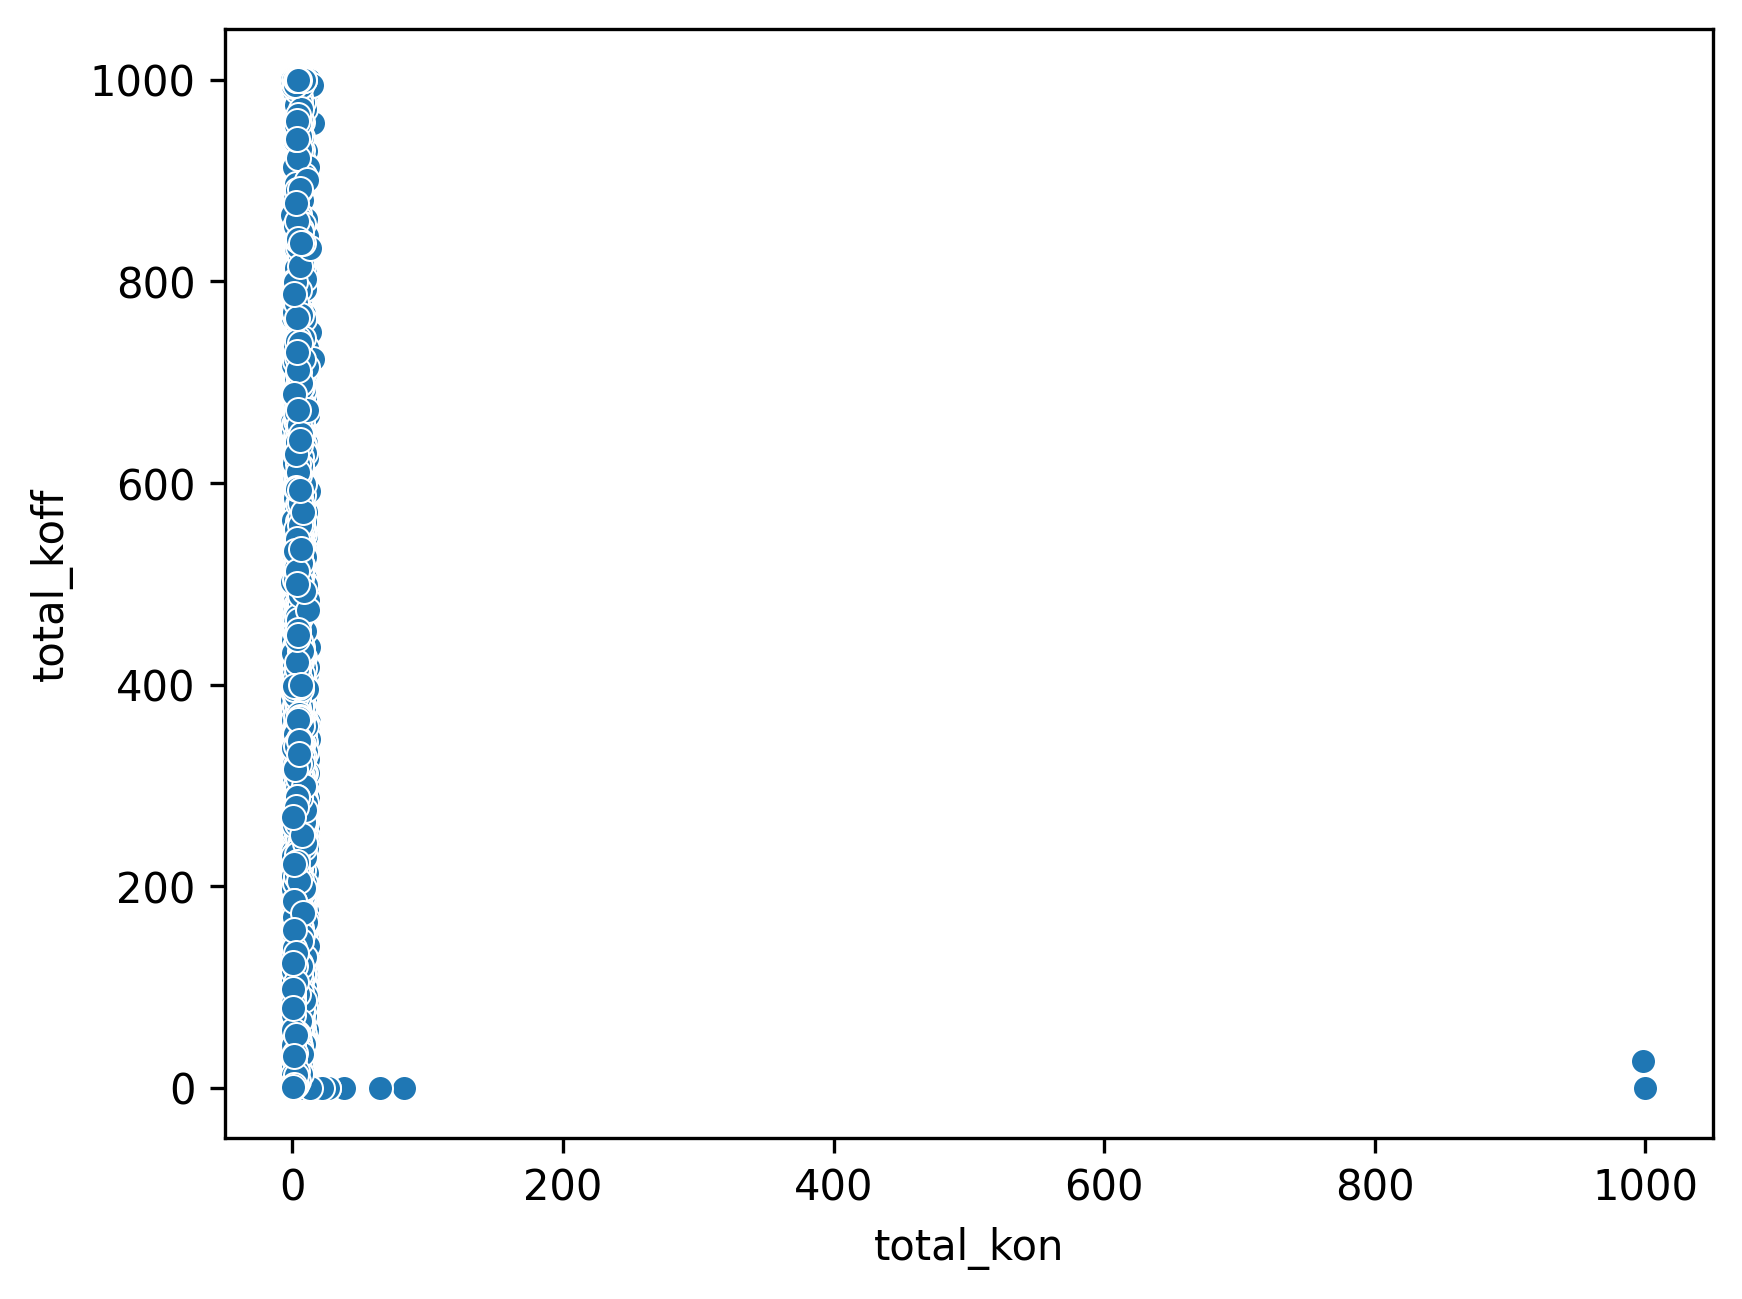

In [14]:
sns.scatterplot(adata.var, x='total_kon', y='total_koff')

/tmp/ipykernel_85653/2862412127.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  glue = sns.load_dataset("glue").pivot("Model", "Task", "Score")


<AxesSubplot: xlabel='Task', ylabel='Model'>

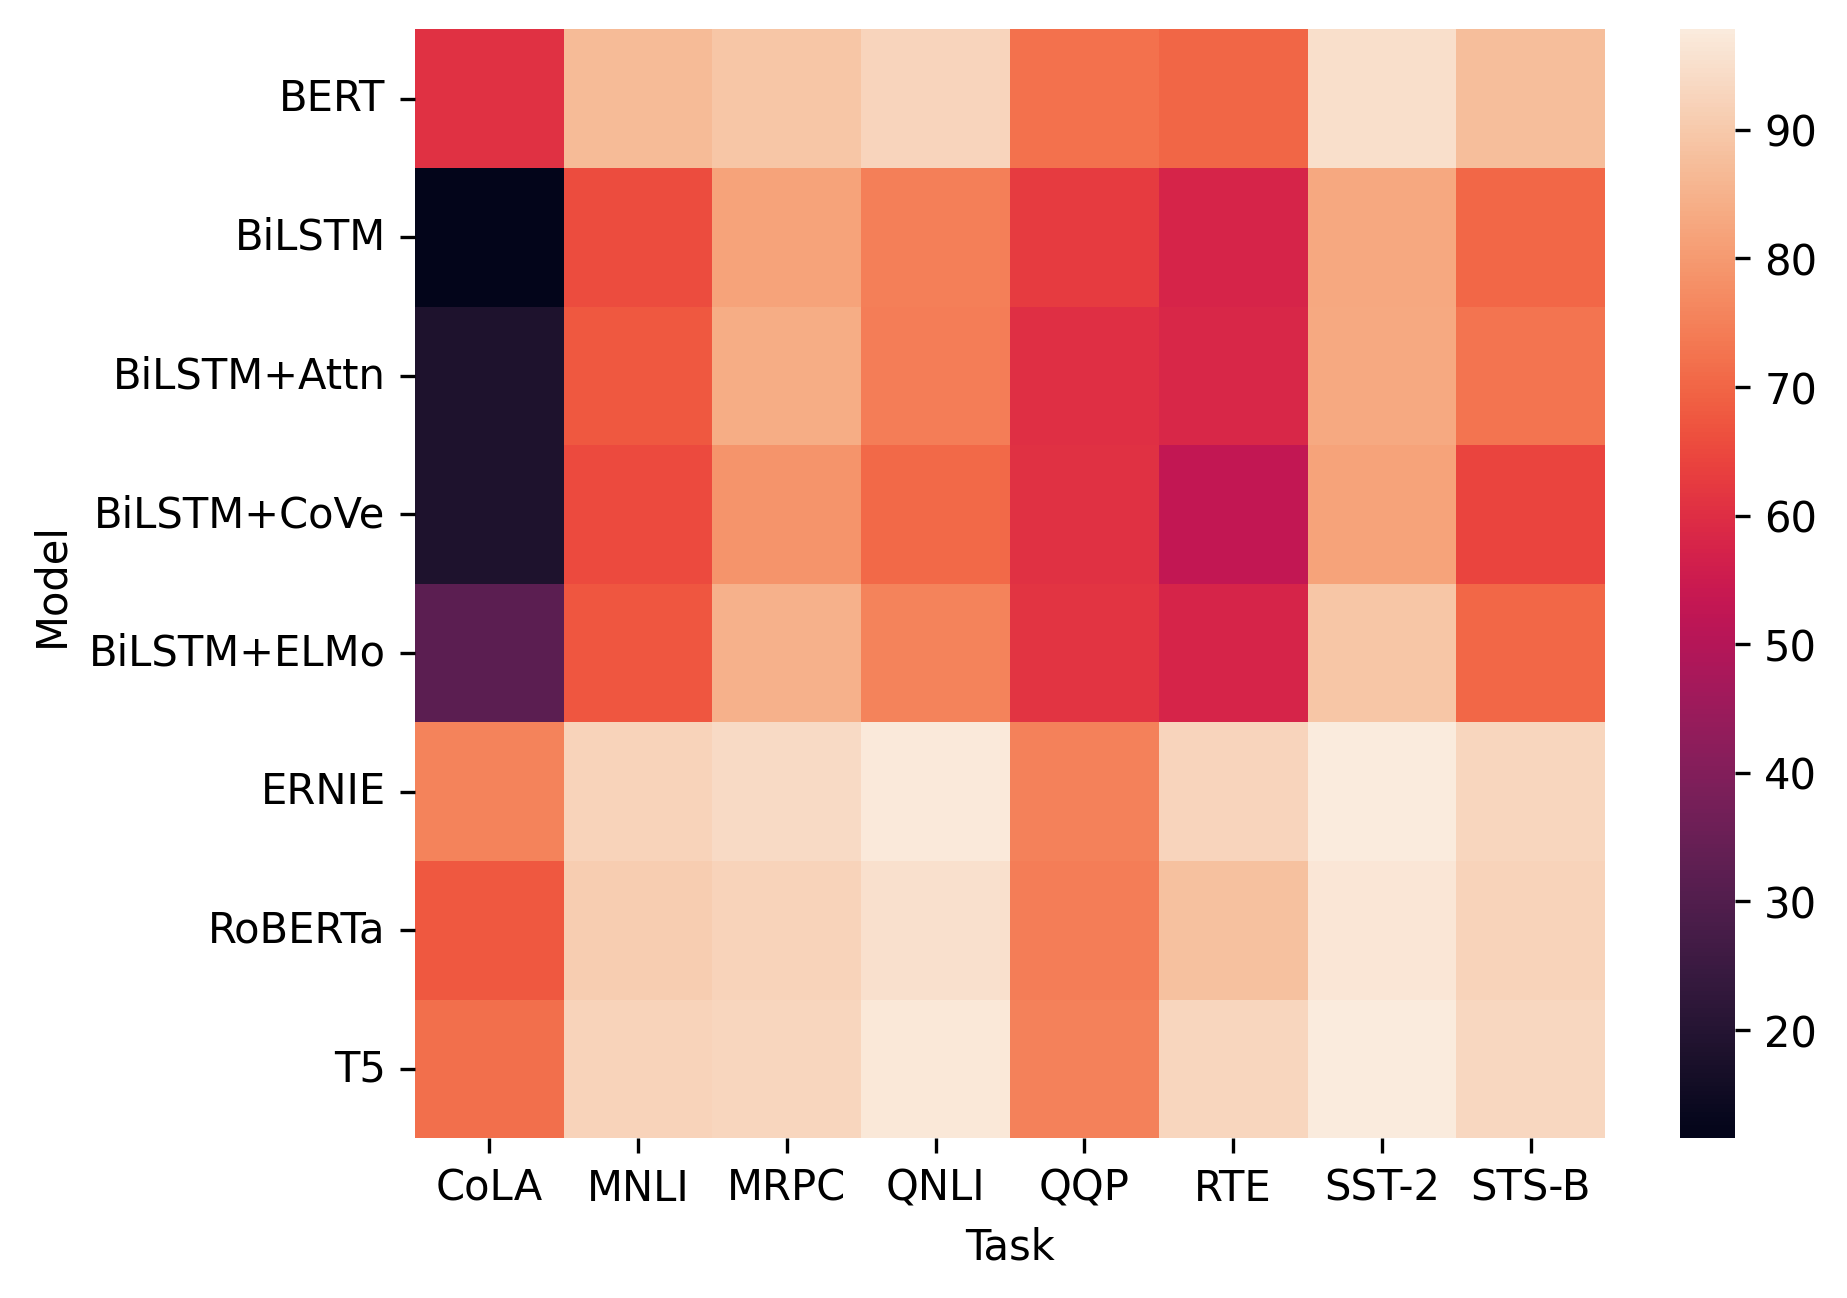

In [15]:
glue = sns.load_dataset("glue").pivot("Model", "Task", "Score")
sns.heatmap(glue)

In [16]:
sns.load_dataset("glue")

,Model,Year,Encoder,Task,Score
0,ERNIE,2019,Transformer,CoLA,75.5
1,T5,2019,Transformer,CoLA,71.6
2,RoBERTa,2019,Transformer,CoLA,67.8
3,BERT,2018,Transformer,CoLA,60.5
4,BiLSTM+ELMo,2018,LSTM,CoLA,32.1
...,...,...,...,...,...
59,BERT,2018,Transformer,RTE,70.1
60,BiLSTM+ELMo,2018,LSTM,RTE,57.4
61,BiLSTM+CoVe,2017,LSTM,RTE,52.7
62,BiLSTM+Attn,2017,LSTM,RTE,58.4


In [17]:
sns.load_dataset("glue").pivot("Model", "Task", "Score")

/tmp/ipykernel_85653/3150067600.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.load_dataset("glue").pivot("Model", "Task", "Score")


Task,CoLA,MNLI,MRPC,QNLI,QQP,RTE,SST-2,STS-B
Model,,,,,,,,
BERT,60.5,86.7,89.3,92.7,72.1,70.1,94.9,87.6
BiLSTM,11.6,65.6,81.8,74.6,62.5,57.4,82.8,70.3
BiLSTM+Attn,18.6,67.6,83.9,74.3,60.1,58.4,83.0,72.8
BiLSTM+CoVe,18.5,65.4,78.7,70.8,60.6,52.7,81.9,64.4
BiLSTM+ELMo,32.1,67.2,84.7,75.5,61.1,57.4,89.3,70.3
ERNIE,75.5,92.3,93.9,97.3,75.2,92.6,97.8,93.0
RoBERTa,67.8,90.8,92.3,95.4,74.3,88.2,96.7,92.2
T5,71.6,92.2,92.8,96.9,75.1,92.8,97.5,93.1


In [50]:
adata.var.columns

Index(['Accession', 'Chromosome', 'End', 'Start', 'Strand', 'sum_allele_c57',
       'sum_allele_cast', 'sum_ratio_allele_c57', 'sum_ratio_allele_cast',
       'ratio_sum_allele_c57', 'ratio_sum_allele_cast',
       'ratio_mean_allele_c57', 'ratio_mean_allele_cast',
       'ratio_std_allele_c57', 'ratio_std_allele_cast', 'allele_p_value',
       'gene_name', 'chromosome', 'autosomes', 'nuclear', 'Ribosomal_prot',
       'gene_count_corr', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma',
       'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood',
       'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s',
       'fit_variance', 'fit_alignment_scaling', 'velocity_genes', 'c57_kon',
       'c57_koff', 'c57_ksyn', 'cast_kon', 'cast_koff', 'cast_ksyn',
       'total_kon', 'total_koff', 'total_ksyn', 'spliced_kon', 'spliced_koff',
       'spliced_ksyn', 'unspliced_kon', 'unspliced_koff', 'unspliced_ksyn',
       'total_s_u_kon', 'total_s_u_koff', 'total_s_u_k

/tmp/ipykernel_85653/3695235827.py:17: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, values in df.iteritems():
/home/anna/miniconda3/envs/bursting/lib/python3.10/site-packages/seaborn/matrix.py:657: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


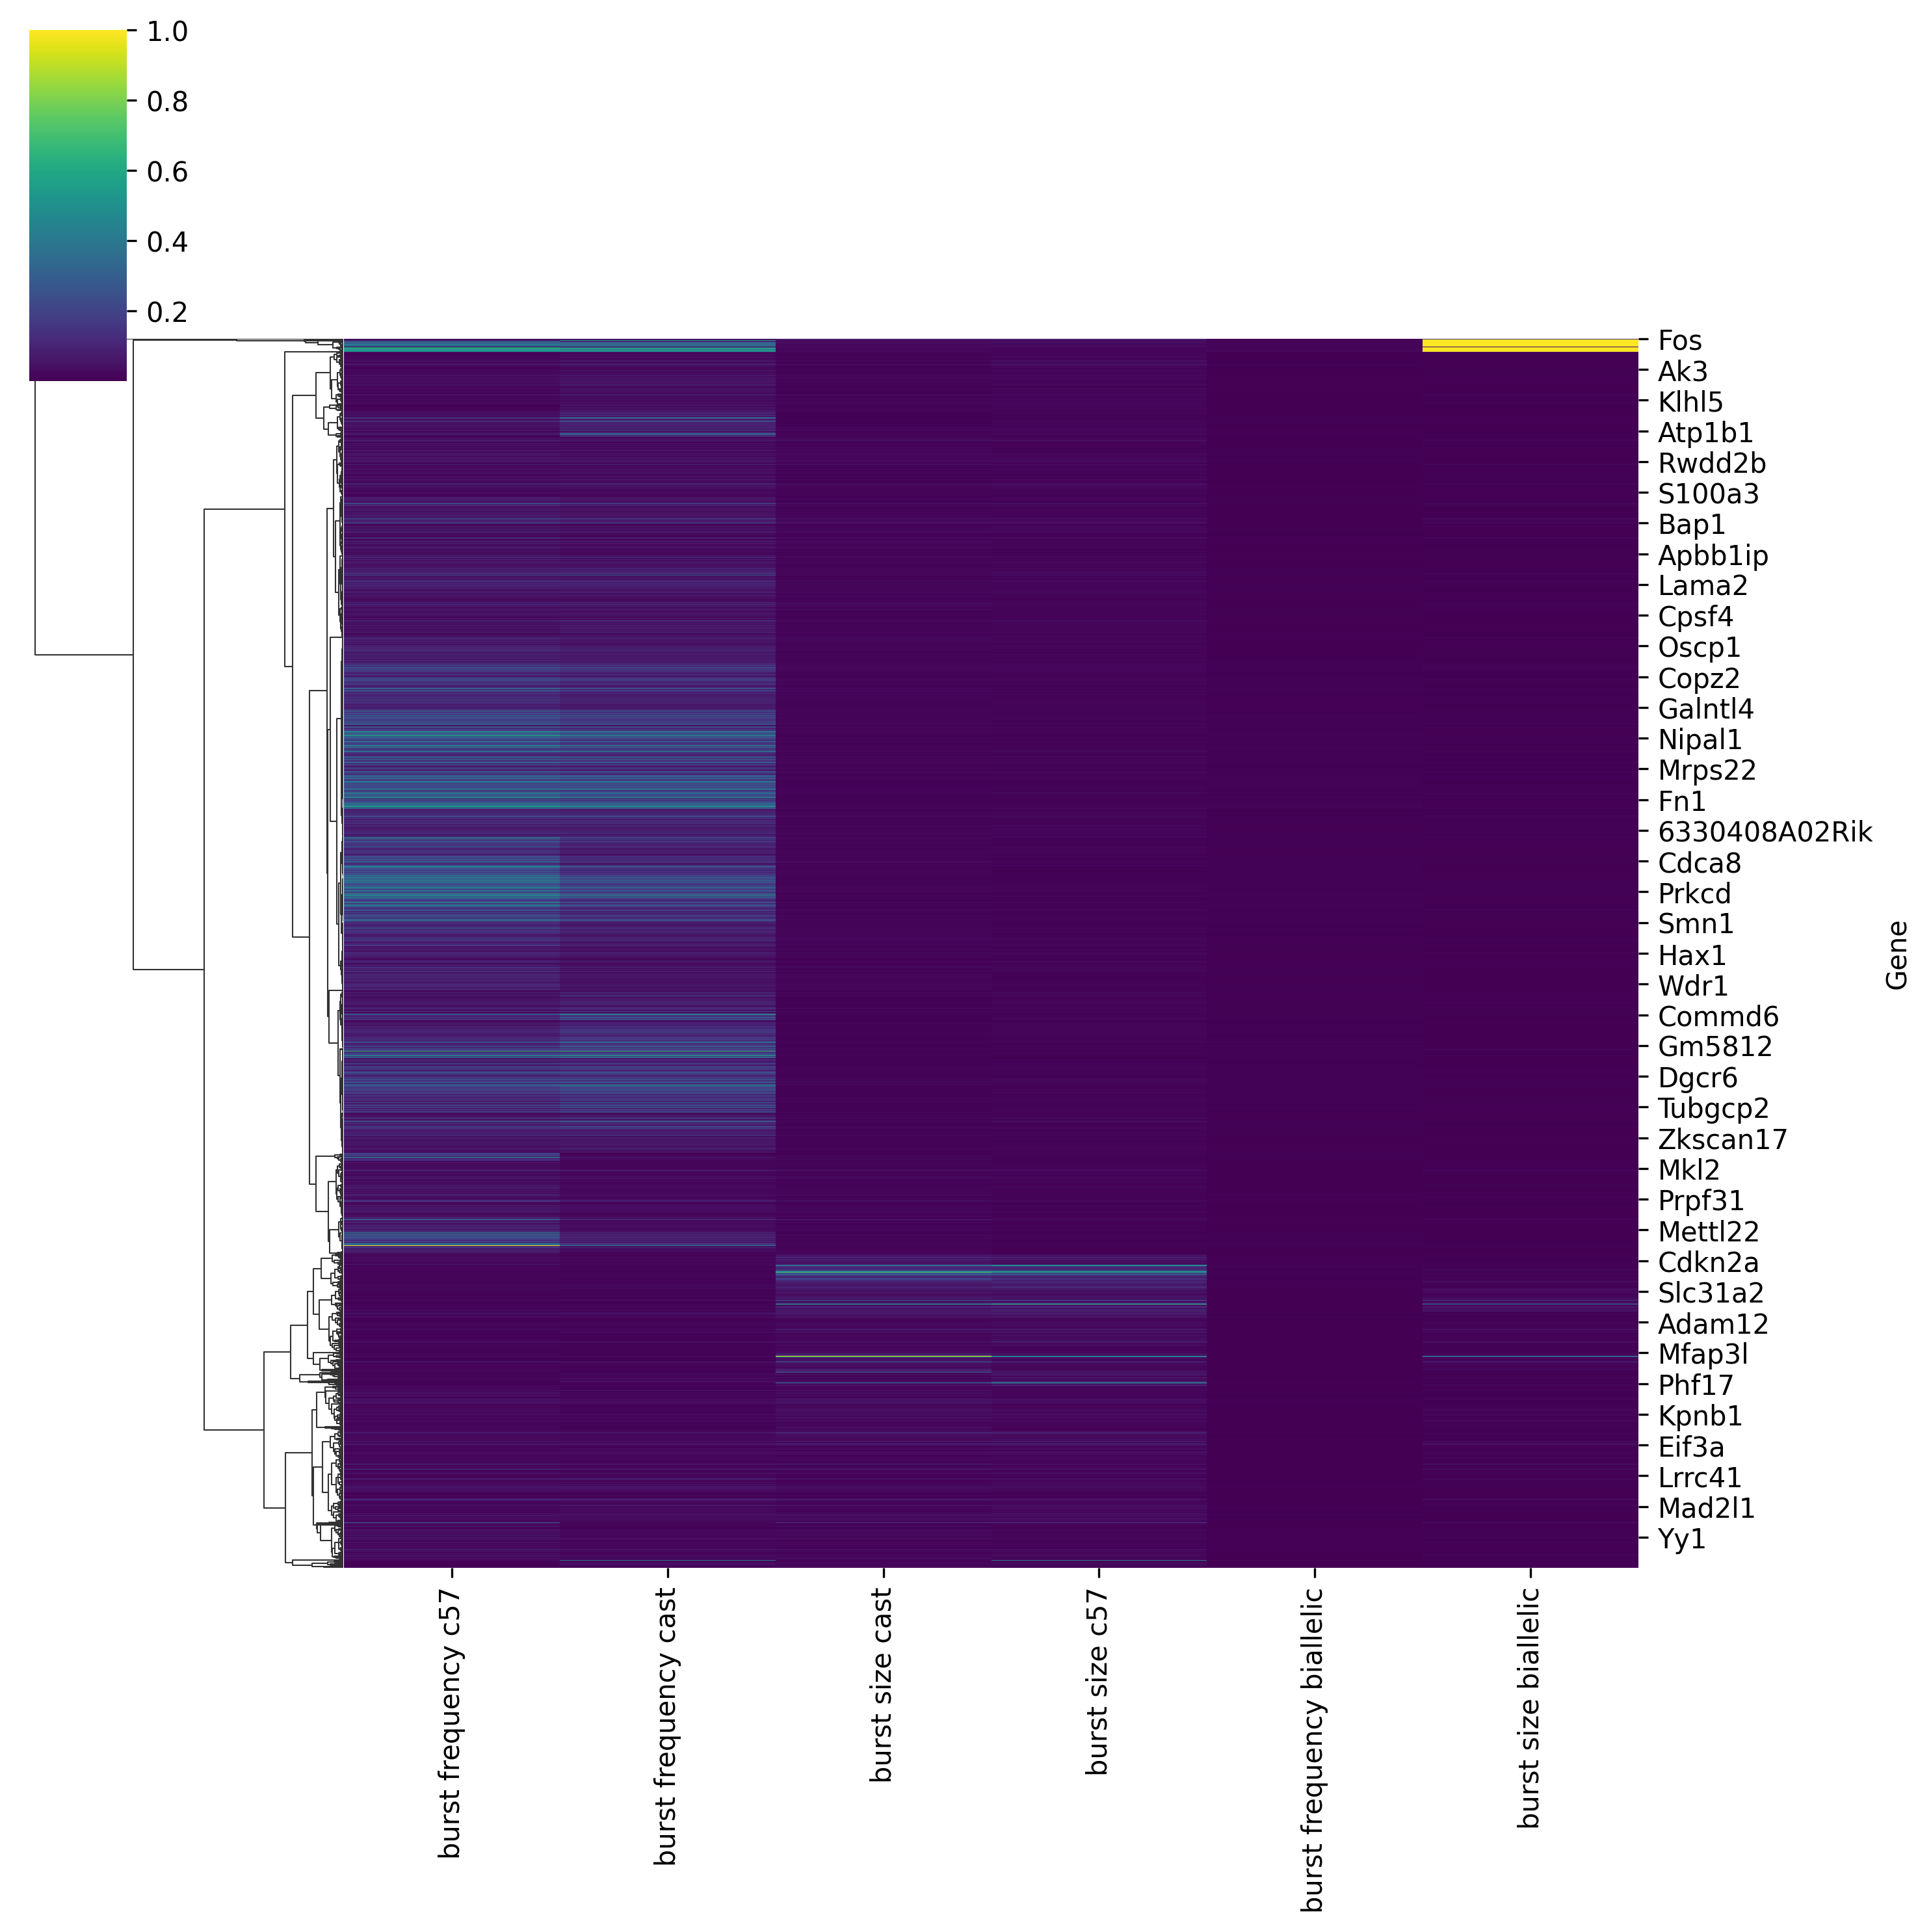

In [74]:
df= pd.DataFrame()
df['burst frequency c57'] = adata.var['c57_kon']/np.max(adata.var['c57_kon'])
df['burst frequency cast'] = adata.var['cast_kon']/np.max(adata.var['cast_kon'])

df['burst size cast'] = adata.var['cast_ksyn']/adata.var['cast_koff']
df['burst size cast'] = df['burst size cast']/np.max(df['burst size cast'])

df['burst size c57'] = adata.var['c57_ksyn']/adata.var['c57_koff']
df['burst size c57'] = df['burst size c57']/np.max(df['burst size c57'])

df['burst frequency biallelic'] = adata.var['total_kon']/np.max(adata.var['total_kon'])
df['burst size biallelic'] = adata.var['total_ksyn']/adata.var['total_koff']
df['burst size biallelic'] = df['burst size biallelic']/np.max(df['burst size biallelic'])

df= df.transpose()
label = []
for column, values in df.iteritems():
    value_status = 'keep'
    for element in values: 
        if np.isnan(element):
            value_status = 'remove'
            
    label.append(value_status)
df= df.transpose()
df['label'] = label
#print(df.shape)
df = df[df['label']=='keep']
del df['label']
#df
#del df['total_kon']
sns.clustermap(df, cmap="viridis", metric="cosine", method="average", z_score=None, col_cluster=False)
plt.savefig("clustermap_CPM.png", bbox_inches="tight")

/tmp/ipykernel_85653/91338276.py:17: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, values in df.iteritems():
/home/anna/miniconda3/envs/bursting/lib/python3.10/site-packages/seaborn/matrix.py:657: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


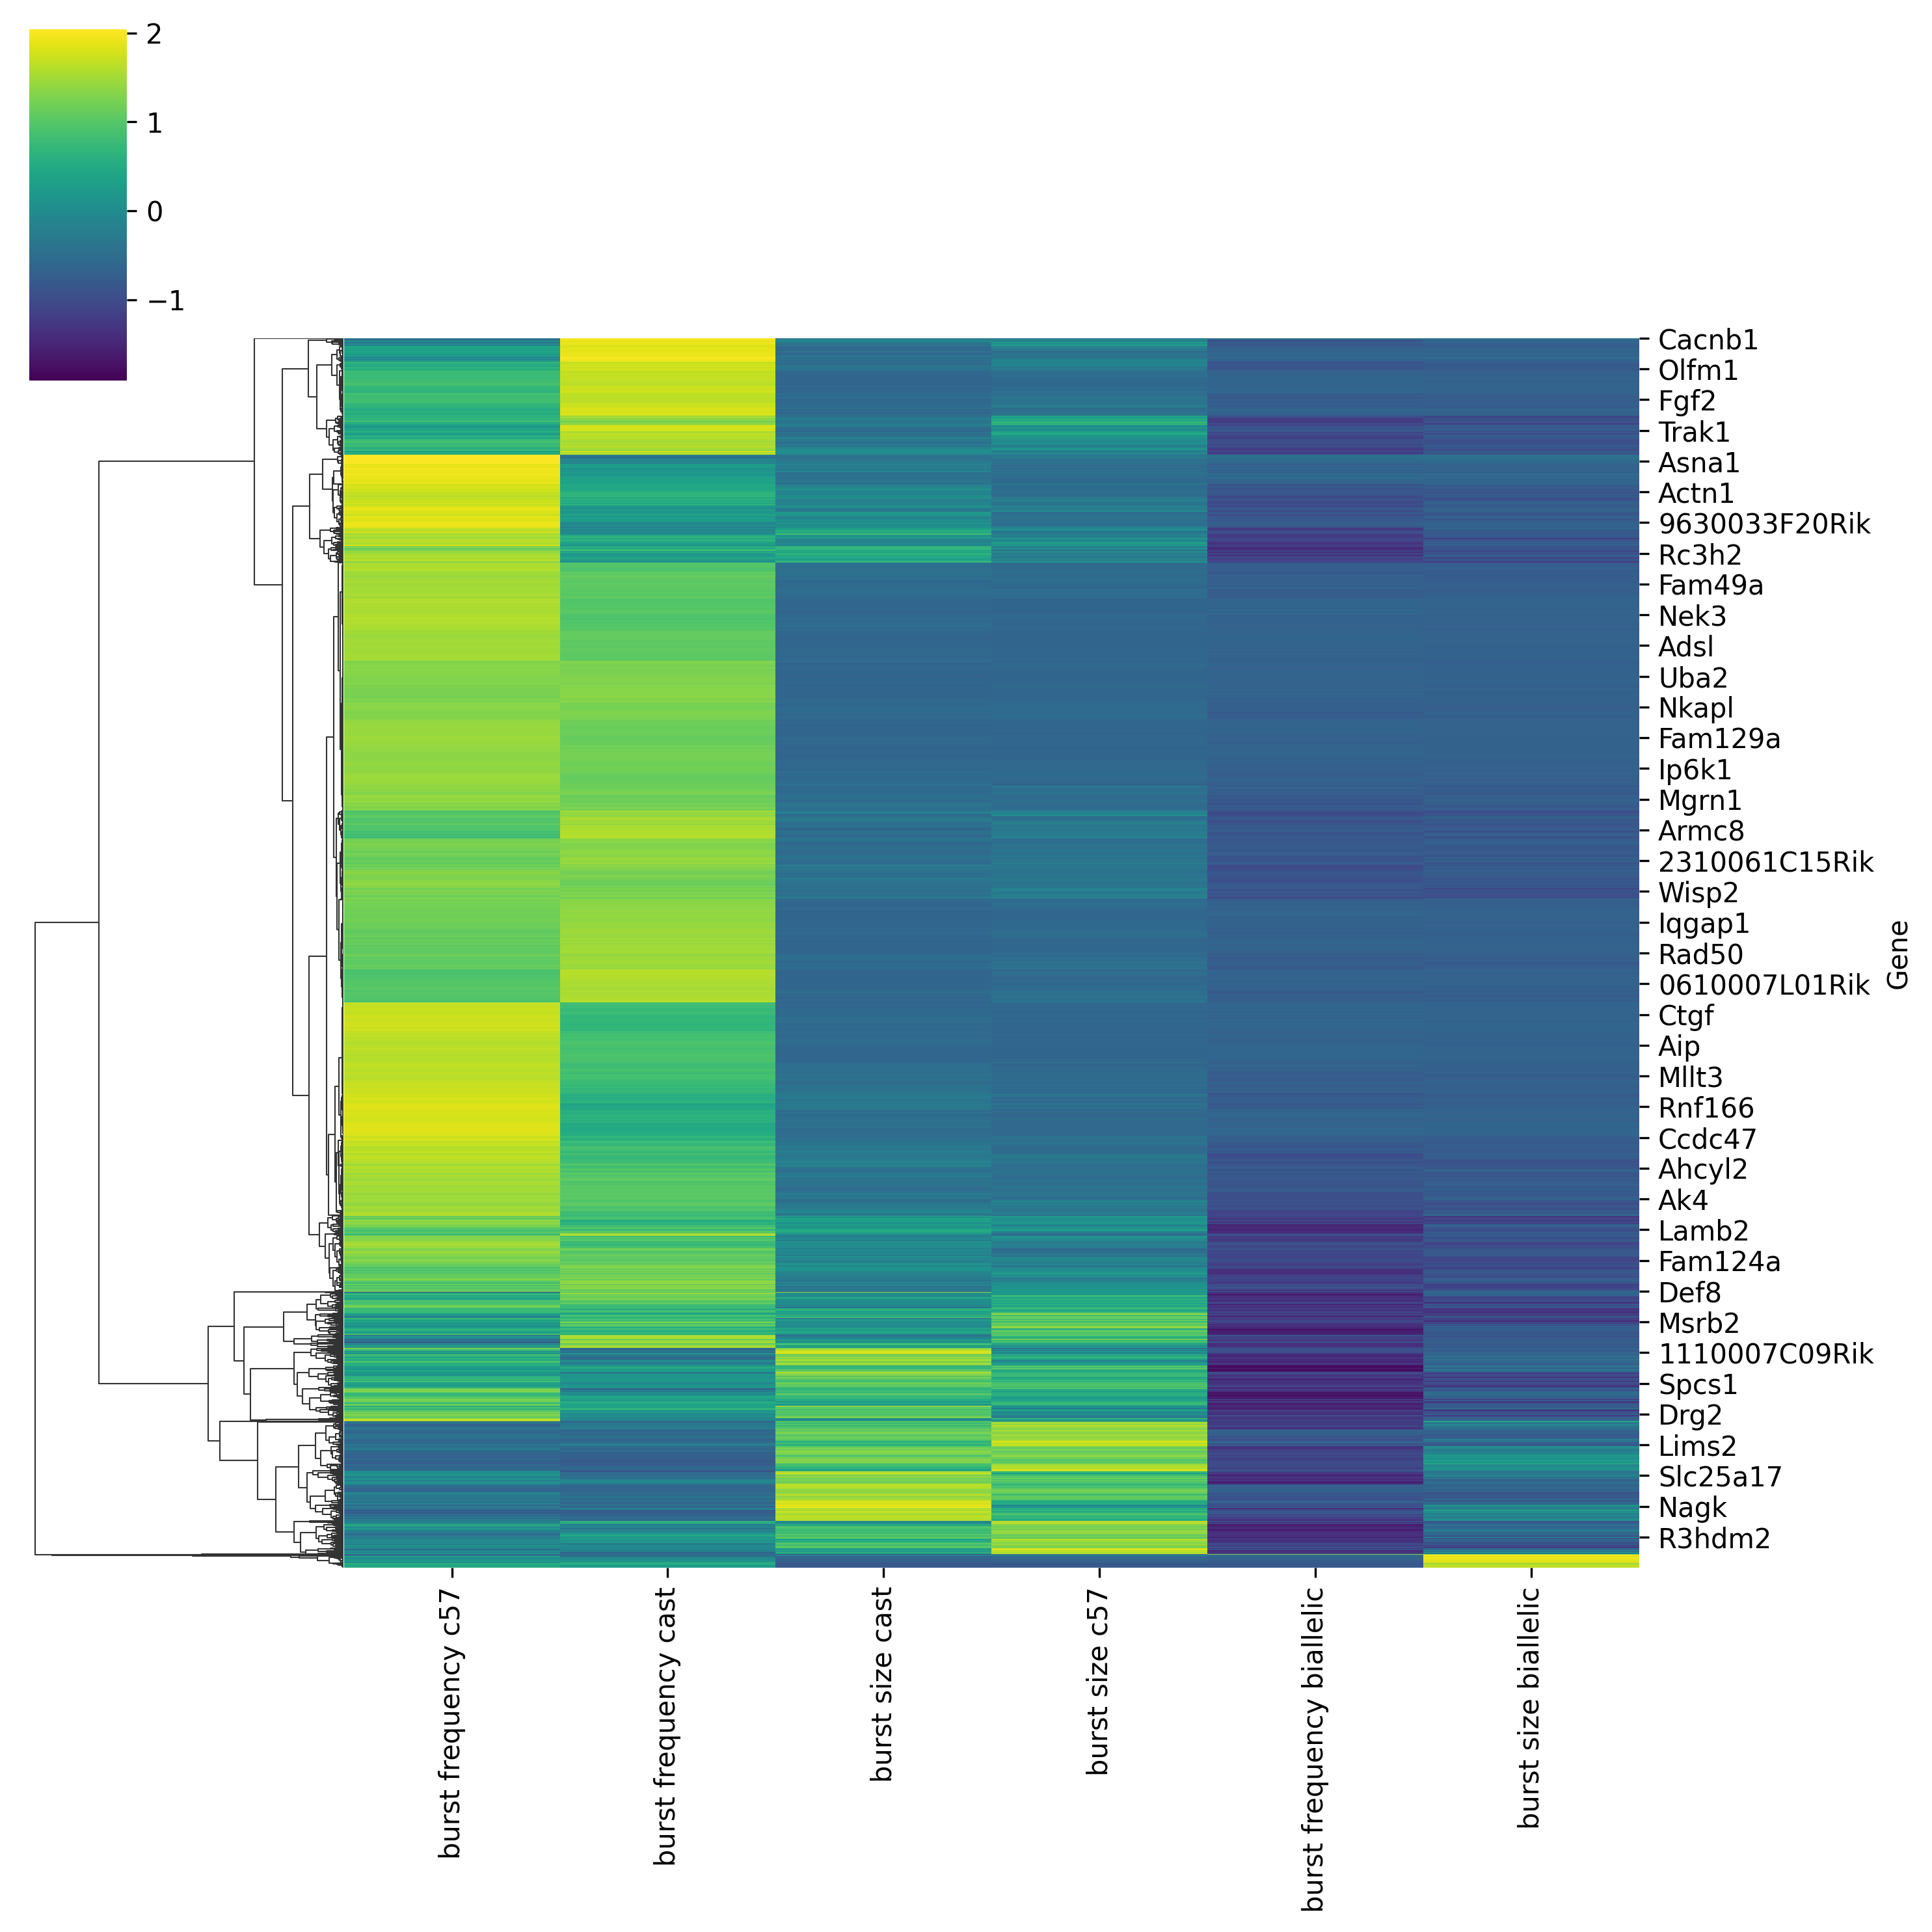

In [78]:
df= pd.DataFrame()
df['burst frequency c57'] = adata.var['c57_kon']/np.max(adata.var['c57_kon'])
df['burst frequency cast'] = adata.var['cast_kon']/np.max(adata.var['cast_kon'])

df['burst size cast'] = adata.var['cast_ksyn']/adata.var['cast_koff']
df['burst size cast'] = df['burst size cast']/np.max(df['burst size cast'])

df['burst size c57'] = adata.var['c57_ksyn']/adata.var['c57_koff']
df['burst size c57'] = df['burst size c57']/np.max(df['burst size c57'])

df['burst frequency biallelic'] = adata.var['total_kon']/np.max(adata.var['total_kon'])
df['burst size biallelic'] = adata.var['total_ksyn']/adata.var['total_koff']
df['burst size biallelic'] = df['burst size biallelic']/np.max(df['burst size biallelic'])

df= df.transpose()
label = []
for column, values in df.iteritems():
    value_status = 'keep'
    for element in values: 
        if np.isnan(element):
            value_status = 'remove'
            
    label.append(value_status)
df= df.transpose()
df['label'] = label
#print(df.shape)
df = df[df['label']=='keep']
del df['label']
#df
#del df['total_kon']
sns.clustermap(df, cmap="viridis", metric="cosine", method="average", z_score=0, col_cluster=False)
plt.savefig("clustermap_CPM.png", bbox_inches="tight")

In [75]:
%pwd

'/home/anna/Documents/research_projects/transcriptional_bursting'

In [ ]:




df= pd.DataFrame()
df['burst frequency c57'] = adata.var['c57_kon']/np.max(adata.var['c57_kon'])
df['burst frequency cast'] = adata.var['cast_kon']/np.max(adata.var['cast_kon'])

df['burst size cast'] = adata.var['cast_ksyn']/adata.var['cast_koff']
df['burst size cast'] = df['burst size cast']/np.max(df['burst size cast'])

df['burst size c57'] = adata.var['c57_ksyn']/adata.var['c57_koff']
df['burst size c57'] = df['burst size c57']/np.max(df['burst size c57'])

df['burst frequency biallelic'] = adata.var['total_kon']/np.max(adata.var['total_kon'])
df['burst size biallelic'] = adata.var['total_ksyn']/adata.var['total_koff']
df['burst size biallelic'] = df['burst size biallelic']/np.max(df['burst size biallelic'])

df= df.transpose()
label = []
for column, values in df.iteritems():
    value_status = 'keep'
    for element in values: 
        if np.isnan(element):
            value_status = 'remove'
            
    label.append(value_status)
df= df.transpose()
df['label'] = label
#print(df.shape)
df = df[df['label']=='keep']
del df['label']
#df
#del df['total_kon']
sns.clustermap(df, cmap="viridis")?

In [33]:
df

Gene,Mrpl15,4732440D04Rik,Cops5,Arfgef1,Tram1,Lactb2,Stau2,Ube2w,Tceb1,Mcm3,...,Zfp651,Snrk,Abhd5,Zfp105,Kif15,Exosc7,Lars2,Sacm1l,Gm5637,Mid1
total_kon,0.175476,1.358319,2.557655,1.560758,4.037842,0.141664,3.546640,5.236145,2.695763,3.963356,...,6.205424,0.619169,1.233901,3.619396,4.436604,1.348519,0.978933,0.573285,0.329559,0.398392
c57_kon,0.137540,0.779018,0.784568,0.562565,3.433453,0.060442,0.948563,1.157455,0.262724,2.492509,...,0.932220,0.111712,0.568978,2.674528,1.552531,0.638748,0.110824,0.431688,0.117589,0.208090
cast_kon,0.122347,0.699138,1.147452,0.575572,3.621442,0.057536,1.275338,1.210509,0.179991,2.615485,...,1.176259,0.366961,0.529610,2.685525,0.890220,0.615424,0.447942,0.405336,0.186108,0.426684


In [43]:
np.max(df['total_kon'])

1000.0

In [44]:
np.max(df['c57_kon'])

14.516043361246776

In [55]:
df

,burst frequency c57,burst frequency cast,burst size cast,burst size c57,burst frequency biallelic,burst size biallelic
Gene,,,,,,
Mrpl15,0.137540,0.122347,15.946756,15.743812,0.175476,24.584943
4732440D04Rik,0.779018,0.699138,2.716637,3.035545,1.358319,3.025959
Cops5,0.784568,1.147452,10.939161,20.714896,2.557655,9.849518
Arfgef1,0.562565,0.575572,5.884419,5.956399,1.560758,3.814466
Tram1,3.433453,3.621442,2.860091,3.240180,4.037842,5.335522
...,...,...,...,...,...,...
Exosc7,0.638748,0.615424,8.493003,8.439157,1.348519,7.855627
Lars2,0.110824,0.447942,4.715019,9.418359,0.978933,3.433188
Sacm1l,0.431688,0.405336,4.619438,5.001986,0.573285,7.426186


<AxesSubplot: xlabel='burst frequency c57', ylabel='burst size c57'>

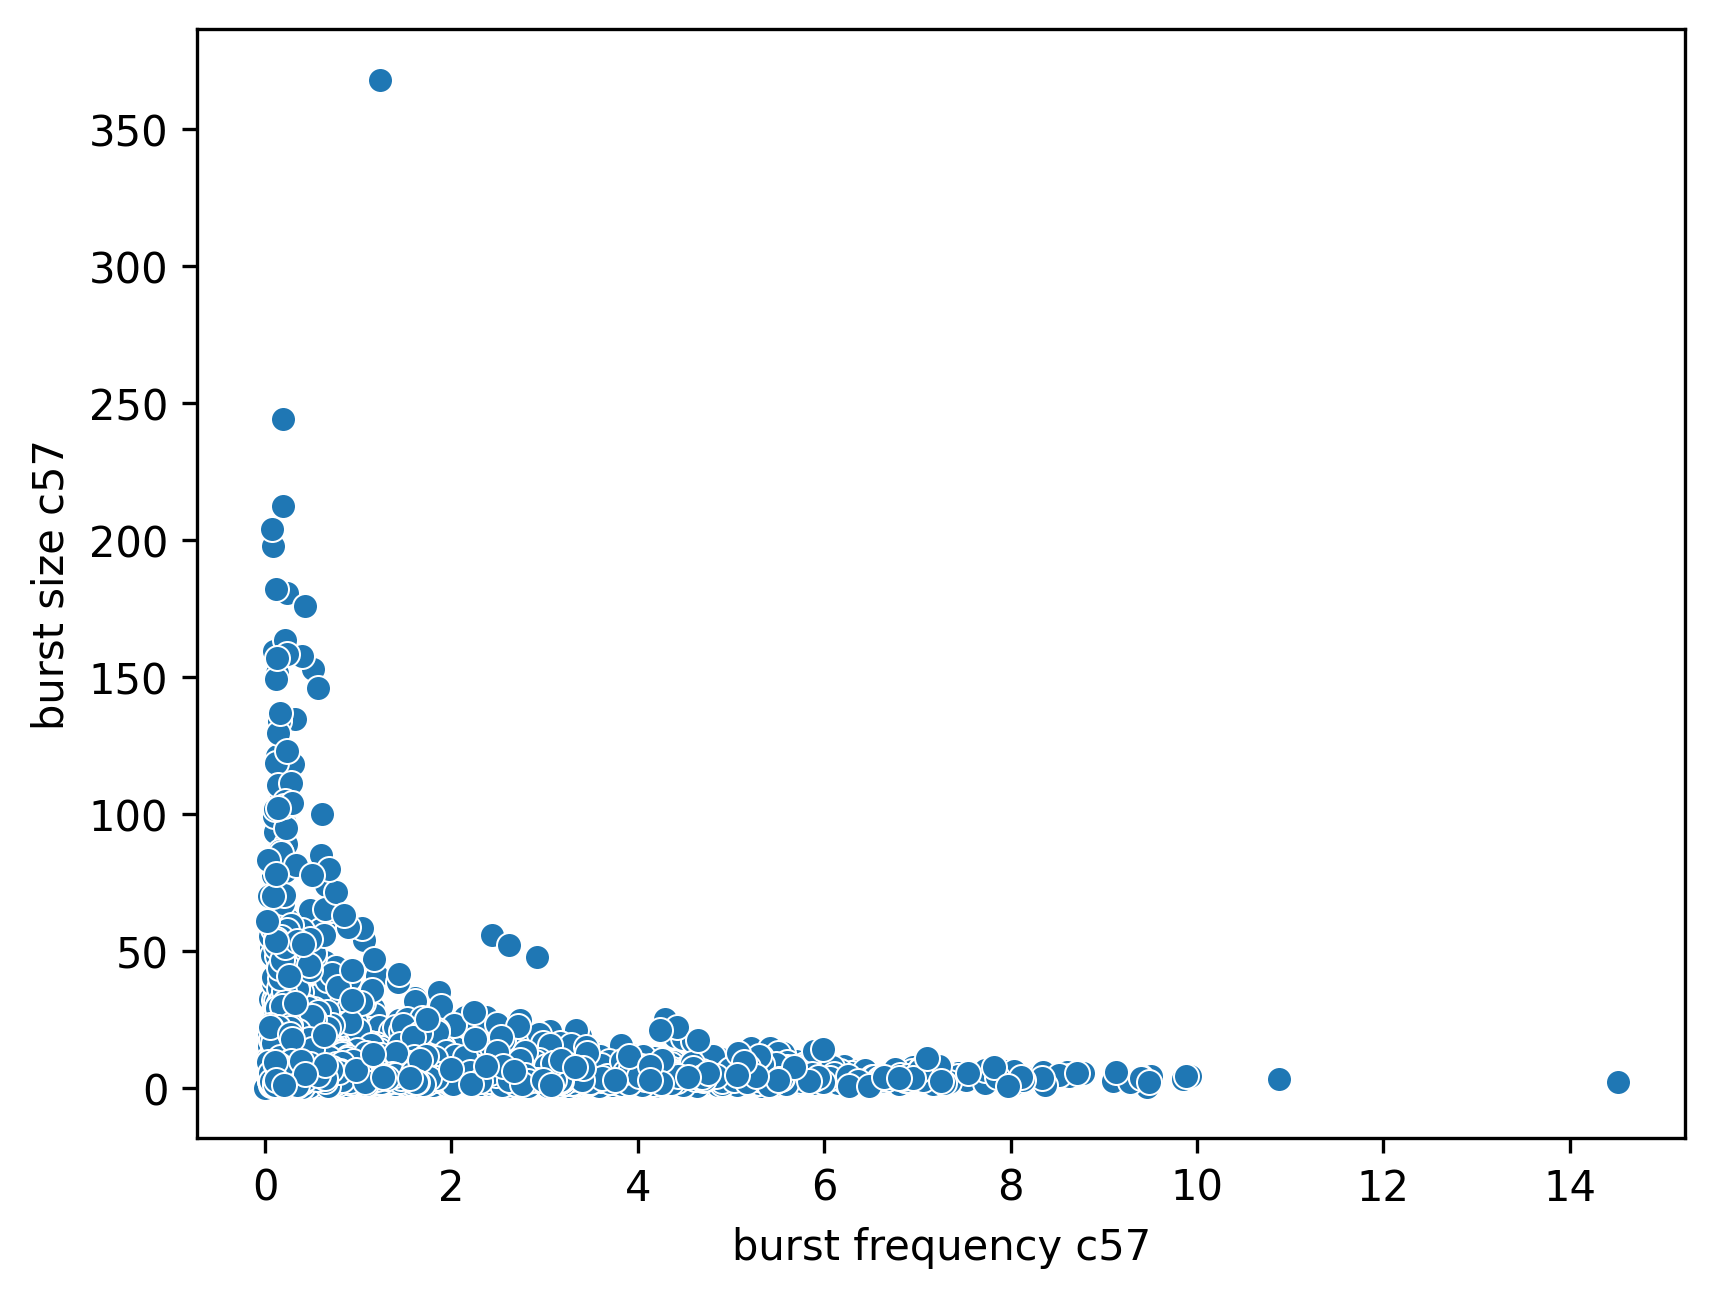

In [57]:
sns.scatterplot(df, x='burst frequency c57', y='burst size c57')

<AxesSubplot: xlabel='burst frequency cast', ylabel='burst size cast'>

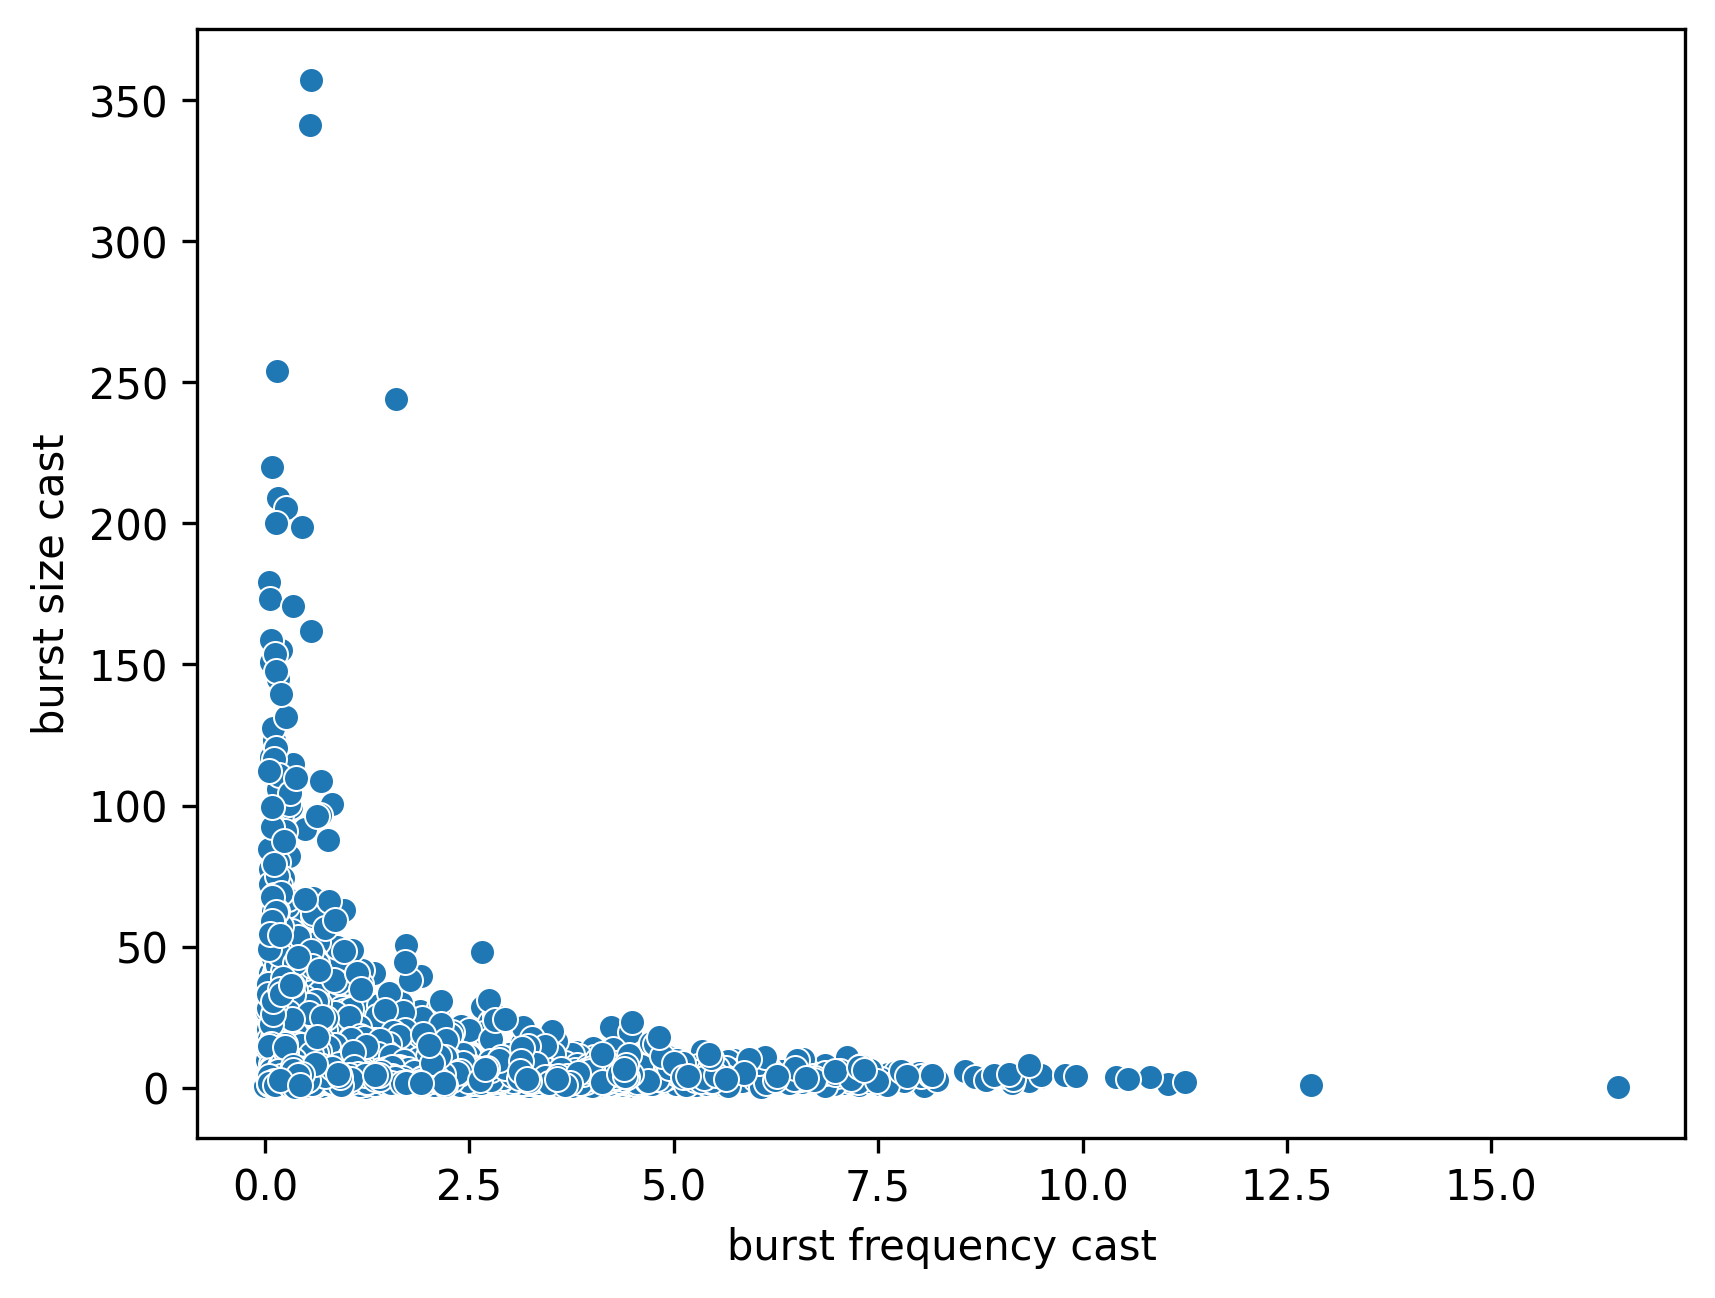

In [58]:
sns.scatterplot(df, x='burst frequency cast', y='burst size cast')

<AxesSubplot: xlabel='burst frequency biallelic', ylabel='burst size biallelic'>

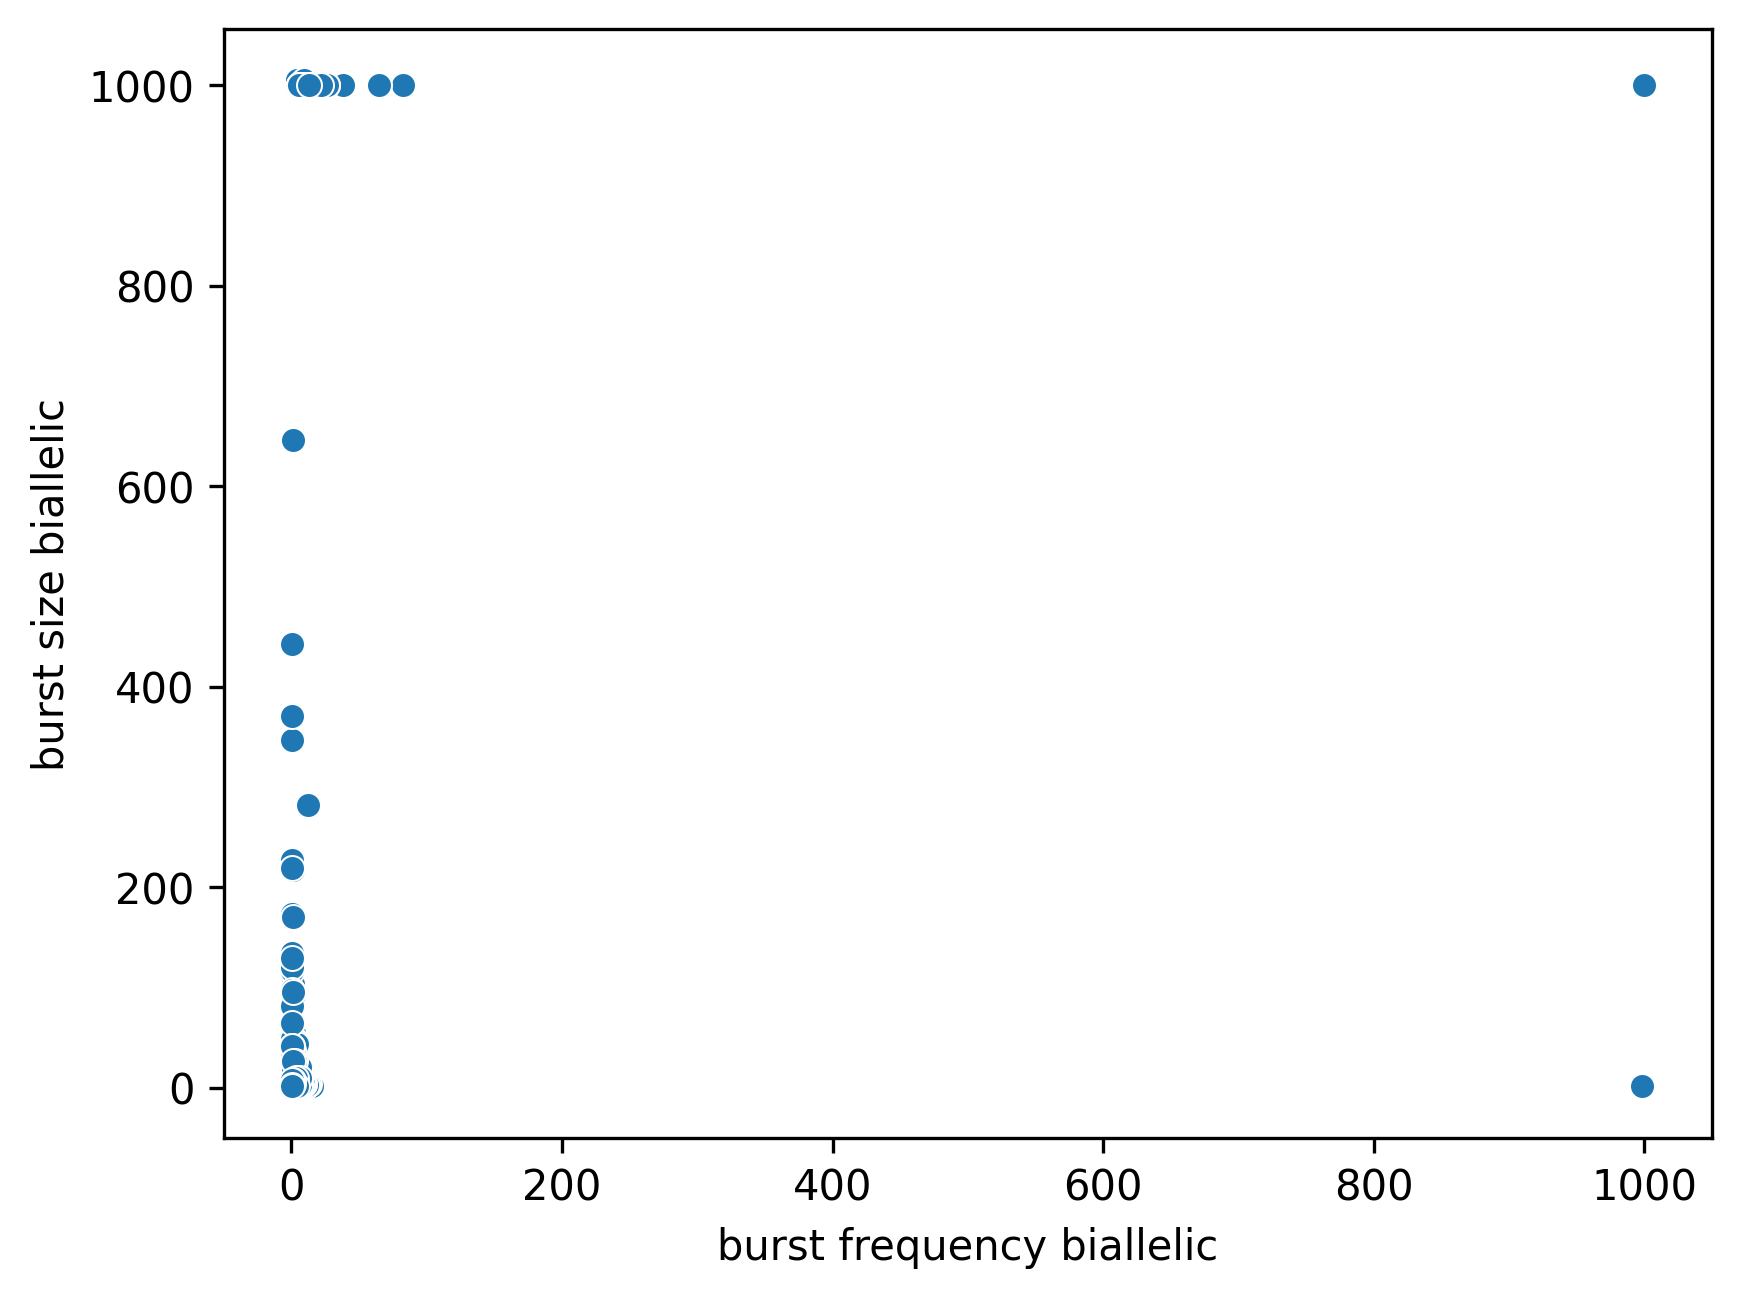

In [60]:
sns.scatterplot(df, x='burst frequency biallelic', y='burst size biallelic')